In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
points = np.genfromtxt("data.csv", delimiter=",")
X = points[:, 0].reshape(-1, 1)  # Feature
y = points[:, 1]  # Target



In [3]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]


In [4]:
def run_gradient_descent():
    points = np.genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0  # initial y-intercept guess
    initial_m = 0  # initial slope guess
    num_iterations = 1000
    b, m = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    error = compute_error_for_line_given_points(b, m, points)
    return b, m, error

b_gd, m_gd, error_gd = run_gradient_descent()
print(f"Gradient Descent -> b: {b_gd}, m: {m_gd}, error: {error_gd}")


Gradient Descent -> b: 0.08893651993741346, m: 1.4777440851894448, error: 112.61481011613473


In [5]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
b_sklearn = model.intercept_
m_sklearn = model.coef_[0]
error_sklearn = mean_squared_error(y, y_pred)

print(f"scikit-learn Linear Regression -> b: {b_sklearn}, m: {m_sklearn}, error: {error_sklearn}")


scikit-learn Linear Regression -> b: 7.991020982270399, m: 1.3224310227553597, error: 110.25738346621316


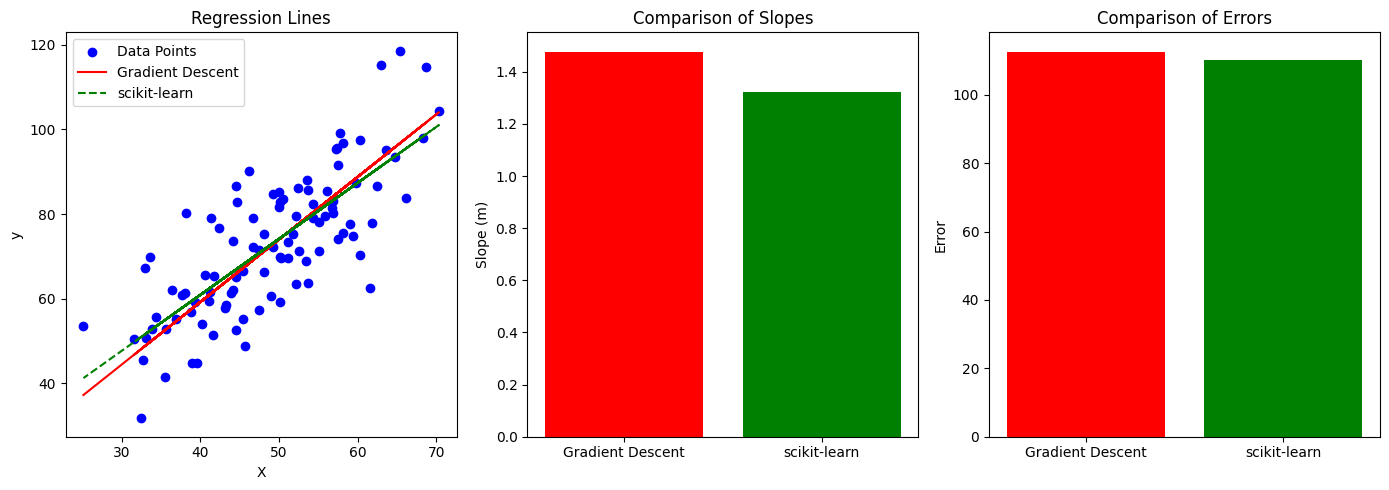

In [6]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, m_gd * X + b_gd, color='red', label='Gradient Descent')
plt.plot(X, m_sklearn * X + b_sklearn, color='green', linestyle='--', label='scikit-learn')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Lines')
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(['Gradient Descent', 'scikit-learn'], [m_gd, m_sklearn], color=['red', 'green'])
plt.ylabel('Slope (m)')
plt.title('Comparison of Slopes')

plt.subplot(1, 3, 3)
plt.bar(['Gradient Descent', 'scikit-learn'], [error_gd, error_sklearn], color=['red', 'green'])
plt.ylabel('Error')
plt.title('Comparison of Errors')

plt.tight_layout()
plt.show()
